In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "travel_data.csv" #accessing the file path of the excel sheet
data = pd.read_csv(file_path) #creating dataframe with the specified filepath
data.dropna(inplace=True)  # Remove rows with missing values

In [131]:
print(data)

  Vehicle_Type Fuel_Type  Total_Distance  Start_lat  Start_lon  Stop_lat  \
0          Car    Petrol           8.812     12.960     77.621    13.026   
1          Car    Diesel           7.000     12.960     77.621    13.026   
2          Car  Electric           2.000     12.960     77.621    13.026   
3          Car    Petrol           8.812     12.960     77.621    13.026   
4          Bus    Diesel           5.200     13.412     77.621    12.960   
5          Bus    Diesel           0.000     12.960     77.621    12.960   
6          Bus    Diesel           0.000     12.960     77.621    12.960   

   Stop_lon  
0    77.576  
1    77.576  
2    77.576  
3    74.576  
4    77.621  
5    77.621  
6    77.621  


In [133]:
data.dtypes

Vehicle_Type       object
Fuel_Type          object
Total_Distance    float64
Start_lat         float64
Start_lon         float64
Stop_lat          float64
Stop_lon          float64
dtype: object

In [63]:
#energy_rates = {
#    'electric': 0.15,  # kWh/km
#    'petrol': 0.12,    # liters/km
#    'diesel': 0.10     # liters/km
#} 




In [61]:
#energy_rates['electric'], energy_rates['petrol'], energy_rates['diesel']

In [11]:
#def calculate_energy(row):
    #fuel_type = row['Fuel_Type'].lower()
    #return row['Total_Distance'] * energy_rates[fuel_type]

In [135]:
#mileage values for in km/liter and km/kwh (electric) for different combinations of vehicles.
energy_rates = {            
    ('bus','diesel'): 4.5,
    ('auto','petrol'): 30,
    ('car','petrol'): 17.5,
    ('car','diesel'): 21.5,
    ('car','electric'): 6.5

}

In [137]:
emission_factors = {
    'electric': 0,          # kg CO2/kWh (assumed clean energy source)
    'petrol': 2.31,         # kg CO2/liter
    'diesel': 2.68          # kg CO2/liter
}


In [139]:
# Add Energy and Carbon Footprint Columns
def calculate_energy(row):
    fuel_type = row['Fuel_Type'].lower()
    vehicle_type = row['Vehicle_Type'].lower()
    print(fuel_type,vehicle_type)
    return row['Total_Distance'] / (energy_rates.get((vehicle_type,fuel_type), 0))

In [141]:
def calculate_emissions(row):
    fuel_type = row['Fuel_Type'].lower()
    return calculate_energy(row) * emission_factors.get(fuel_type, 0) 

In [143]:
data['Energy_Consumed'] = data.apply(calculate_energy, axis=1)

petrol car
diesel car
electric car
petrol car
diesel bus
diesel bus
diesel bus


In [145]:
data['Carbon_Footprint'] = data.apply(calculate_emissions, axis=1)

petrol car
diesel car
electric car
petrol car
diesel bus
diesel bus
diesel bus


In [147]:
print(data)


  Vehicle_Type Fuel_Type  Total_Distance  Start_lat  Start_lon  Stop_lat  \
0          Car    Petrol           8.812     12.960     77.621    13.026   
1          Car    Diesel           7.000     12.960     77.621    13.026   
2          Car  Electric           2.000     12.960     77.621    13.026   
3          Car    Petrol           8.812     12.960     77.621    13.026   
4          Bus    Diesel           5.200     13.412     77.621    12.960   
5          Bus    Diesel           0.000     12.960     77.621    12.960   
6          Bus    Diesel           0.000     12.960     77.621    12.960   

   Stop_lon  Energy_Consumed  Carbon_Footprint  
0    77.576         0.503543          1.163184  
1    77.576         0.325581          0.872558  
2    77.576         0.307692          0.000000  
3    74.576         0.503543          1.163184  
4    77.621         1.155556          3.096889  
5    77.621         0.000000          0.000000  
6    77.621         0.000000          0.000000  

In [149]:
data.to_csv("processedData.csv")

In [151]:
print(data)

  Vehicle_Type Fuel_Type  Total_Distance  Start_lat  Start_lon  Stop_lat  \
0          Car    Petrol           8.812     12.960     77.621    13.026   
1          Car    Diesel           7.000     12.960     77.621    13.026   
2          Car  Electric           2.000     12.960     77.621    13.026   
3          Car    Petrol           8.812     12.960     77.621    13.026   
4          Bus    Diesel           5.200     13.412     77.621    12.960   
5          Bus    Diesel           0.000     12.960     77.621    12.960   
6          Bus    Diesel           0.000     12.960     77.621    12.960   

   Stop_lon  Energy_Consumed  Carbon_Footprint  
0    77.576         0.503543          1.163184  
1    77.576         0.325581          0.872558  
2    77.576         0.307692          0.000000  
3    74.576         0.503543          1.163184  
4    77.621         1.155556          3.096889  
5    77.621         0.000000          0.000000  
6    77.621         0.000000          0.000000  

In [157]:
# Aggregate Analysis
summary = data.groupby(['Vehicle_Type', 'Fuel_Type']).agg({
    'Total_Distance': 'sum',
    'Energy_Consumed': 'sum',
    'Carbon_Footprint': 'sum'
}).reset_index()


In [161]:
print(summary)

  Vehicle_Type Fuel_Type  Total_Distance  Energy_Consumed  Carbon_Footprint
0          Bus    Diesel           5.200         1.155556          3.096889
1          Car    Diesel           7.000         0.325581          0.872558
2          Car  Electric           2.000         0.307692          0.000000
3          Car    Petrol          17.624         1.007086          2.326368


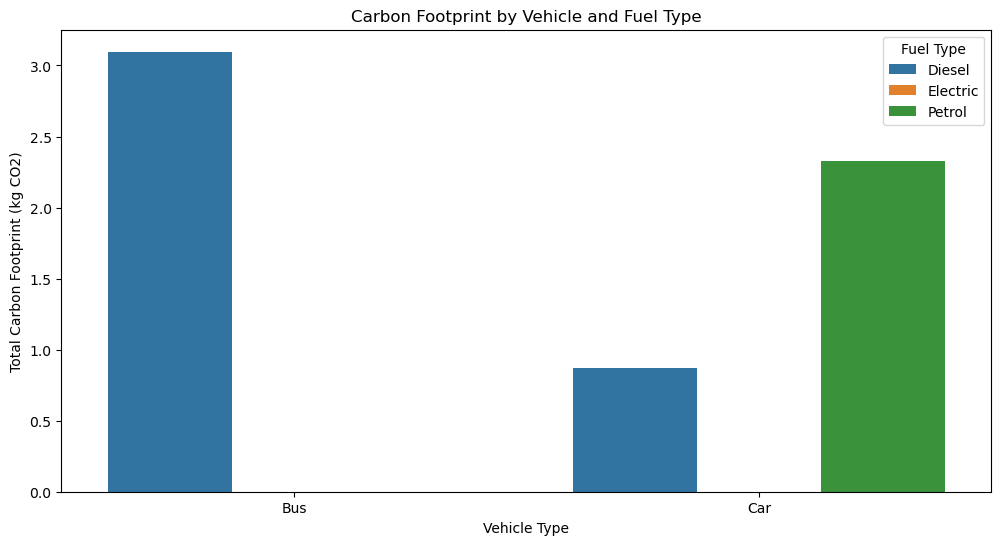

In [177]:
# Visualization of the data
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Vehicle_Type', y='Carbon_Footprint', hue='Fuel_Type')
plt.title('Carbon Footprint by Vehicle and Fuel Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Carbon Footprint (kg CO2)')
plt.legend(title='Fuel Type')
plt.show()

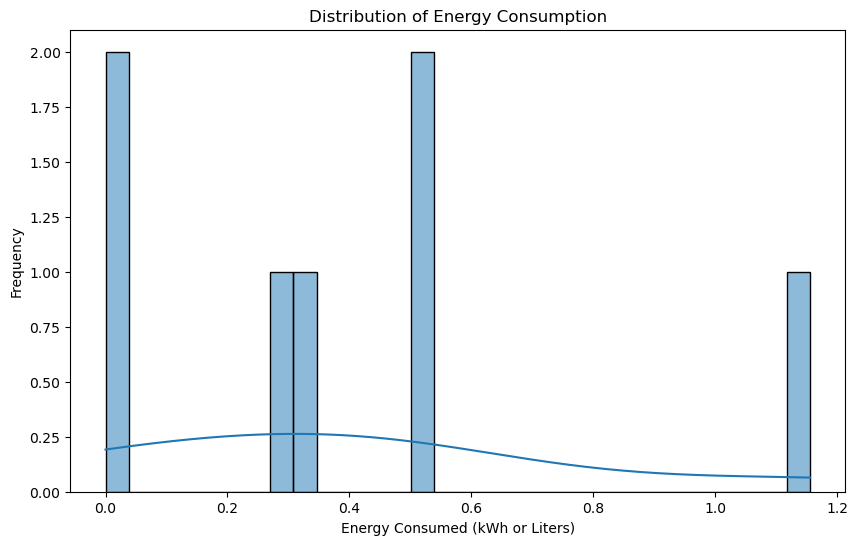

In [181]:
# Histogram of Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(data['Energy_Consumed'], kde=True, bins=30)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumed (kWh or Liters)')
plt.ylabel('Frequency')
plt.show()






In [175]:
# Recommendations
high_emission_trips = data[data['Carbon_Footprint'] > data['Carbon_Footprint'].mean()]
print("High-emission trips identified for optimization:\n", high_emission_trips)

High-emission trips identified for optimization:
   Vehicle_Type Fuel_Type  Total_Distance  Start_lat  Start_lon  Stop_lat  \
0          Car    Petrol           8.812     12.960     77.621    13.026   
3          Car    Petrol           8.812     12.960     77.621    13.026   
4          Bus    Diesel           5.200     13.412     77.621    12.960   

   Stop_lon  Energy_Consumed  Carbon_Footprint  
0    77.576         0.503543          1.163184  
3    74.576         0.503543          1.163184  
4    77.621         1.155556          3.096889  


In [ ]:
# Data Cleaning - Checking for missing values and removing and row if found


#data['distance'] = data['distance'].astype(float)  # Ensure distance is numeric

# Define Energy Consumption and Emission Rates

#energy_rates = {
#   'electric': 0.15,  # kWh/km
#   'petrol': 0.12,    # liters/km
#   'diesel': 0.10     # liters/km
#}



energy_rates = {             #mileage values for in km/liter and km/kwh (electric) for different combinations of vehicles.
    ('bus','diesel'): 4.5
    ('auto','petrol'): 30
    ('car','petrol'): 17.5
    ('car','diesel'): 21.5
    ('car','electric'): 6.5

}
emission_factors = {
    'electric': 0,          # kg CO2/kWh (assumed clean energy source)
    'petrol': 2.31,         # kg CO2/liter
    'diesel': 2.68          # kg CO2/liter
}

# Add Energy and Carbon Footprint Columns
def calculate_energy(row):
    fuel_type = row['Fuel_Type'].lower()
    vehicle_type = row['Vehicle_Type'].lower()
    return row['Total_Distance'] / energy_rates.get((fuel_type,vehicle_type), 0)

def calculate_emissions(row):
    fuel_type = row['Fuel_Type'].lower()
    return calculate_energy(row) * emission_factors.get(fuel_type, 0) 

data['energy_consumed'] = data.apply(calculate_energy, axis=1)
data['carbon_footprint'] = data.apply(calculate_emissions, axis=1)

# Aggregate Analysis
summary = data.groupby(['Vehicle_Type', 'Fuel_Type']).agg({
    'Total_Distance': 'sum',
    'Energy_Consumed': 'sum',
    'Carbon_Footprint': 'sum'
}).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='vehicleType', y='carbon_footprint', hue='fuelType')
plt.title('Carbon Footprint by Vehicle and Fuel Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Carbon Footprint (kg CO2)')
plt.legend(title='Fuel Type')
plt.show()

# Histogram of Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(data['energy_consumed'], kde=True, bins=30)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumed (kWh or Liters)')
plt.ylabel('Frequency')
plt.show()

# Recommendations
high_emission_trips = data[data['carbon_footprint'] > data['carbon_footprint'].mean()]
print("High-emission trips identified for optimization:\n", high_emission_trips)

